In [1]:
import os

train_dir = 'C:/Users/KIMHAKBIN/A_My Python/Datacloud/digits/MNIST_mni/train'
test_dir = 'C:/Users/KIMHAKBIN/A_My Python/Datacloud/digits/MNIST_mni/test'

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)


#train_datagen.fit(images, augment=True, seed=seed)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size = (28,28),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size = (28,28),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Using TensorFlow backend.


Found 7291 images belonging to 10 classes.
Found 2007 images belonging to 10 classes.


In [3]:
from keras import layers
from keras import models

model1 = models.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(32, (3, 3), activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.4))

model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.MaxPooling2D((2,2)))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.4))

model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
model1.add(layers.BatchNormalization())
model1.add(layers.Dropout(0.4))
model1.add(layers.Dense(10, activation='softmax'))

In [4]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
__________

In [5]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model1.fit_generator(train_generator,
                               steps_per_epoch=114, 
                               epochs=60,
                               validation_data=validation_generator,
                               validation_steps=32)

Epoch 1/60
114/114 [==============================] - 6s 57ms/step - loss: 0.5536 - acc: 0.8281 - val_loss: 0.1693 - val_acc: 0.9452
Epoch 2/60
114/114 [==============================] - 4s 39ms/step - loss: 0.1577 - acc: 0.9508 - val_loss: 0.1249 - val_acc: 0.9596
Epoch 3/60
114/114 [==============================] - 5s 41ms/step - loss: 0.1169 - acc: 0.9663 - val_loss: 0.1198 - val_acc: 0.9606
Epoch 4/60
114/114 [==============================] - 4s 39ms/step - loss: 0.0881 - acc: 0.9729 - val_loss: 0.0725 - val_acc: 0.9751
Epoch 5/60
114/114 [==============================] - 4s 39ms/step - loss: 0.0738 - acc: 0.9775 - val_loss: 0.0708 - val_acc: 0.9791
Epoch 6/60
114/114 [==============================] - 4s 39ms/step - loss: 0.0685 - acc: 0.9797 - val_loss: 0.0604 - val_acc: 0.9786
Epoch 7/60
114/114 [==============================] - 4s 39ms/step - loss: 0.0628 - acc: 0.9786 - val_loss: 0.0581 - val_acc: 0.9811
Epoch 8/60
114/114 [==============================] - 4s 39ms/step - 

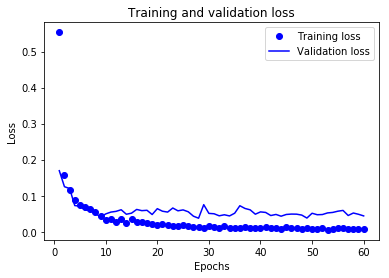

In [8]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

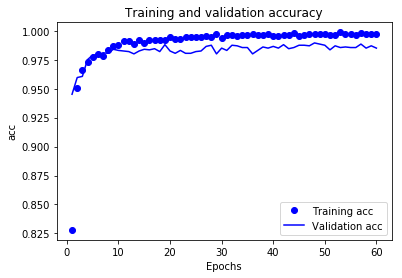

In [9]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()

plt.show()